In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

path = '../dataset/'

## 데이터 불러오기 및 전처리 (생략가능)

In [2]:
# # excel 파일로 불러오기

# train = pd.read_excel(f'{path}titanic_train.xlsx')
# test = pd.read_excel(f'{path}titanic_test.xlsx')

In [3]:
# # csv 파일 불러오기

# train = pd.read_csv(f'{path}titanic_train.csv')
# test = pd.read_csv(f'{path}titanic_test.csv')

In [4]:
# 깃허브에 업로드 된 csv 불러오기

train = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/titanic_test.csv')

In [5]:
train0 = train.drop(['Age', 'Cabin'], axis = 1)
test0 = test.drop(['Age', 'Cabin'], axis = 1)

In [6]:
#train0에서 Embarked가 결측인 두 행을 제거합니다.
train0 = train0.dropna()
#제거 여부 확인해봅니다.
train0.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
#test0에서 결측된 Fare값을 평균으로 대체합니다.
test0 = test0.fillna(test0.mean())
#처리 여부를 확인해봅니다.
test0.isna().sum()

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_53005/4231629342.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test0 = test0.fillna(test0.mean())


PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
#Name변수와 Ticket 변수를 제거합니다.
train1 = train0.drop(['Name', 'Ticket'], axis = 1)
test1 = test0.drop(['Name', 'Ticket'], axis = 1)

In [9]:
#Sex데이터를 숫자형으로 변환합니다.
train1['Sex'] = train1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test1['Sex'] = test1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [10]:
#Embarked 데이터를 숫자형으로 변환합니다.
train1['Embarked'] = train1['Embarked'].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)
test1['Embarked'] = test1['Embarked'].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)

In [11]:
# 저장하기

# train1.to_csv(f'{path}preprocessing_titanic_train.csv')
# train1.to_excel(f'{path}preprocessing_titanic_train.xlsx')

# test1.to_csv(f'{path}preprocessing_titanic_test.csv')
# test1.to_excel(f'{path}preprocessing_titanic_test.xlsx')

## 데이터 전처리가 완료된 데이터 불러오기

In [12]:
# # excel 파일 불러오기

# train = pd.read_excel(f'{path}preprocessing_titanic_train.xlsx', index_col= 'Unnamed: 0')
# test  = pd.read_excel(f'{path}preprocessing_titanic_test.xlsx', index_col= 'Unnamed: 0')

In [13]:
# # csv 파일 불러오기

# train = pd.read_csv(f'{path}preprocessing_titanic_train.csv', index_col= 'Unnamed: 0')
# test  = pd.read_csv(f'{path}preprocessing_titanic_test.csv', index_col= 'Unnamed: 0')

In [26]:
# 깃허브 불러오기

train = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/preprocessing_titanic_train.csv',index_col= 'Unnamed: 0')
test  = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/preprocessing_titanic_test.csv',index_col= 'Unnamed: 0')

In [27]:
#모델의 훈련을 위하여 설명변수와 반응변수를 분리합니다.
X_train = train.drop(["PassengerId","Survived"], axis=1)
Y_train = train["Survived"]

X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 6), (889,), (418, 6))

## 1. 로지스틱 회귀분석 시행

### A. 로지스틱 회귀분석 가정 (1) : 다중공선성 측정

In [28]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

print(vif(X_train))
print(vif(X_test))

   VIF Factor  features
0    4.204295    Pclass
1    4.040719  Embarked
2    1.605835       Sex
3    1.594589     Parch
4    1.517530     SibSp
5    1.402283      Fare
   VIF Factor  features
0    3.773055    Pclass
1    3.520877  Embarked
2    1.609372       Sex
3    1.413119      Fare
4    1.412016     SibSp
5    1.358322     Parch


### B. Logistic Regression 시행

In [29]:
import statsmodels.api as sm

logreg = sm.Logit(Y_train, X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.459106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                  0.3099
Time:                        01:27:28   Log-Likelihood:                -408.15
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 4.834e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6247      0.076     -8.239      0.000      -0.773      -0.476
Sex            2.7472      0.193     14.209      0.000       2.368       3.126
SibSp         -0.2572      0.100     -2.582      0.010      -0.452      -0.062
Parch         -0.1029      0.113     -0.913      0.361      -0.324       0.118
Fare           0.0058      0.002      2.846      0.004       0.002       0.010
Embarked      -0.1238      0.099     -1.254      0.210      -0.317       0.070
==============================================================================
"""

In [30]:
# list 생성
x_vars = list(logreg.summary2().tables[1].index)
statistic = []
p_val = []
d_f = []

# 리스트에 append (왈드 통계치, p값, 자유도)
for i in x_vars:
    statistic.append(logreg.wald_test(i).statistic[0][0])
    p_val.append(np.round(logreg.wald_test(i).pvalue, 4))
    d_f.append(logreg.wald_test(i).df_denom)

# 왈드 통계치 데이터 프레임 형성
wald = pd.DataFrame({'wald_statistic' : statistic,
                     'P>|z|' : p_val,
                     'degree_of_freedom' : d_f}, index=x_vars)

wald

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


,wald_statistic,P>|z|,degree_of_freedom
Pclass,67.888388,0.0000,1.0
Sex,201.882226,0.0000,1.0
SibSp,6.666405,0.0098,1.0
Parch,0.832861,0.3614,1.0
Fare,8.097130,0.0044,1.0
Embarked,1.573265,0.2097,1.0


In [31]:
# odds ratio 구하는 부분
odds = np.exp(logreg.params)

for i in range(len(odds)):
    print(f'변수 {X_train.columns[i]}의 logit : {logreg.params[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logreg.params[i] : .3f}배 증가한다.')
    print(f'변수 {X_train.columns[i]}의 odds ratio : {odds[i] : .3f}')
    if odds[i] > 1:
        print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(odds[i]-1) * 100 : .3f}% 증가한다.\n')
    else :
        print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(1 - odds[i]) * 100 : .3f}% 김소한다.\n')


변수 Pclass의 logit : -0.625
변수 Pclass가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.625배 증가한다.
변수 Pclass의 odds ratio :  0.535
변수 Pclass가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 46.457% 김소한다.

변수 Sex의 logit :  2.747
변수 Sex가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 2.747배 증가한다.
변수 Sex의 odds ratio :  15.599
변수 Sex가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1459.945% 증가한다.

변수 SibSp의 logit : -0.257
변수 SibSp가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.257배 증가한다.
변수 SibSp의 odds ratio :  0.773
변수 SibSp가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 22.680% 김소한다.

변수 Parch의 logit : -0.103
변수 Parch가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.103배 증가한다.
변수 Parch의 odds ratio :  0.902
변수 Parch가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 9.782% 김소한다.

변수 Fare의 logit :  0.006
변수 Fare가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.006배 증가한다.
변수 Fare의 odds ratio :  1.006
변수 Fare가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.586% 증가한다.

변수 Embarked의 logit : -0.124
변수 Embarked가 1단위 증가할 때, 생존할 로

In [32]:
sig_level = .05
logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
logistic_variable

,logit,odds ratio,p-value,above 5.0%
Pclass,-0.624685,0.535430,0.0000,Yes
Sex,2.747236,15.599452,0.0000,Yes
SibSp,-0.257217,0.773200,0.0098,Yes
Parch,-0.102936,0.902184,0.3614,No
Fare,0.005845,1.005862,0.0044,Yes
Embarked,-0.123848,0.883514,0.2097,No


In [33]:
pd.concat([logistic_variable, wald[['wald_statistic', 'degree_of_freedom']]], axis = 1)

,logit,odds ratio,p-value,above 5.0%,wald_statistic,degree_of_freedom
Pclass,-0.624685,0.535430,0.0000,Yes,67.888388,1.0
Sex,2.747236,15.599452,0.0000,Yes,201.882226,1.0
SibSp,-0.257217,0.773200,0.0098,Yes,6.666405,1.0
Parch,-0.102936,0.902184,0.3614,No,0.832861,1.0
Fare,0.005845,1.005862,0.0044,Yes,8.097130,1.0
Embarked,-0.123848,0.883514,0.2097,No,1.573265,1.0


In [34]:
def logistic_variable(X_train,Y_train, sig_level=.05, output = True):
    import statsmodels.api as sm
    import numpy as np
    import pandas as pd
    
    logistic_result = sm.Logit(Y_train, X_train).fit()
    print(logistic_result.summary())
    
    # list 생성
    x_vars = list(logreg.summary2().tables[1].index)
    statistic = []
    p_val = []
    d_f = []

    # 리스트에 append (왈드 통계치, p값, 자유도)
    for i in x_vars:
        statistic.append(logreg.wald_test(i).statistic[0][0])
        p_val.append(np.round(logreg.wald_test(i).pvalue, 4))
        d_f.append(logreg.wald_test(i).df_denom)


    # 왈드 통계치 데이터 프레임 형성
    wald = pd.DataFrame({'wald_statistic' : statistic,
                        'P>|z|' : p_val,
                        'degree_of_freedom' : d_f}, index=x_vars)
    
    # odds 생성
    odds = np.exp(logistic_result.params)
    
    if output == True:
        for i in range(len(odds)):
            print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logistic_result.params[i] : .3f}배 증가한다.')
            if odds[i] > 1:
                print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(odds[i]-1) * 100 : .3f}% 증가한다.\n')
            else :
                print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(1 - odds[i]) * 100 : .3f}% 김소한다.\n')    
    else:
        pass
    
    logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
    logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
    logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
    logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
    
    result = pd.concat([logistic_variable, wald[['wald_statistic', 'degree_of_freedom']]], axis = 1)
    
    return result

In [35]:
logistic_variable(X_train,Y_train, .05, True)

Optimization terminated successfully.
         Current function value: 0.459106
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                  0.3099
Time:                        01:27:34   Log-Likelihood:                -408.15
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 4.834e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6247      0.076     -8.239      0.000      -0.773      -0.476
Sex            2.7472      0.

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(



변수 Embarked가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 11.649% 김소한다.



,logit,odds ratio,p-value,above 5.0%,wald_statistic,degree_of_freedom
Pclass,-0.624685,0.535430,0.0000,Yes,67.888388,1.0
Sex,2.747236,15.599452,0.0000,Yes,201.882226,1.0
SibSp,-0.257217,0.773200,0.0098,Yes,6.666405,1.0
Parch,-0.102936,0.902184,0.3614,No,0.832861,1.0
Fare,0.005845,1.005862,0.0044,Yes,8.097130,1.0
Embarked,-0.123848,0.883514,0.2097,No,1.573265,1.0


In [36]:
# 혼동행렬 (confusion matrix)
cm_df = pd.DataFrame(logreg.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,478.0,71.0
Actual 1,110.0,230.0


#### 참고) 임계치 조정

In [37]:
y_pred = logreg.predict(X_train)

y_pred

0      0.088137
1      0.907371
2      0.661907
3      0.873026
4      0.111580
         ...   
886    0.194491
887    0.885967
888    0.574308
889    0.389516
890    0.124269
Length: 889, dtype: float64

In [41]:
def cut_off(y_pred, threshold):
    y = y_pred.copy()
    y[y>threshold] = 1
    y[y<=threshold] = 0
    return y.astype(int)

y_pred = cut_off(logreg.predict(X_train),0.5)

# 실제, 예측 값에 대한 데이터 프레임 형성
df = pd.DataFrame(list(zip(Y_train, y_pred)), columns = {'actual', 'pred'})
df

,actual,pred
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
884,0,0
885,1,1
886,0,1
887,1,0


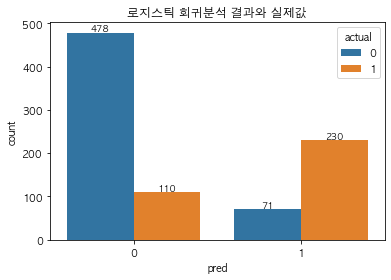

In [42]:
ax = sns.countplot(x=df['pred'], hue=df['actual'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_title('로지스틱 회귀분석 결과와 실제값')
plt.show() 

In [43]:
# 혼동행렬 형성
actual0 = []
actual1 = []

for i in [0,1]:
    for j,k in zip([0,1],[actual0,actual1]):
        k.append(len(df.loc[(df.actual == i) & (df.pred == j)]))

cm_df = pd.DataFrame(zip(actual0, actual1))
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
cm_df

precision = actual0[0]/sum(actual0)
recall = actual0[0]/(actual0[0]+actual1[0])
accuracy = (actual0[0]+actual1[1])/(sum(actual0)+sum(actual1))
f1_scroe = 2 * (precision * recall) / (precision + recall)

print(f'Precision (정밀도) :{precision * 100 : .2f}%')
print(f'Recall (재현율) :{recall * 100 : .2f}%')
print(f'Accuracy (정확도) :{accuracy * 100 : .2f}%')
print(f'F1 Score :{f1_scroe * 100 : .2f}%')

Precision (정밀도) : 81.29%
Recall (재현율) : 87.07%
Accuracy (정확도) : 79.64%
F1 Score : 84.08%


In [44]:
def cut_off(Y_train, Y_pred, threshold):
    # 빈 리스트 생성
    actual0 = []
    actual1 = []
    
    # 임계치 조정
    y = Y_pred.copy()
    y[y>threshold] = 1
    y[y<=threshold] = 0
    y.astype(int)

    # 실제, 예측 값에 대한 데이터 프레임 형성
    tmp = pd.DataFrame(list(zip(Y_train, y)), columns = {'actual', 'pred'})
    
    for i in [0,1]:
        for j,k in zip([0,1],[actual0,actual1]):
            k.append(len(tmp.loc[(tmp.actual == i) & (tmp.pred == j)]))

    # 혼동행렬 형성
    confusion_matrix = pd.DataFrame(zip(actual0, actual1))
    print(actual0 + actual1)
    confusion_matrix.columns = ['Predicted 0', 'Predicted 1']
    confusion_matrix = confusion_matrix.rename(index={0: 'Actual 0',1: 'Actual 1'})
    
    # 평가지표 형성
    precision = actual0[0]/sum(actual0)
    recall = actual0[0]/(actual0[0]+actual1[0])
    accuracy = (actual0[0]+actual1[1])/(sum(actual0)+sum(actual1))
    f1_scroe = 2 * (precision * recall) / (precision + recall)

    print(f'임계치 {threshold} 수준에서의 분류 평가 지표')
    print(f'Precision (정밀도) :{precision * 100 : .2f}%')
    print(f'Recall (재현율) :{recall * 100 : .2f}%')
    print(f'Accuracy (정확도) :{accuracy * 100 : .2f}%')
    print(f'F1 Score :{f1_scroe * 100 : .2f}%')
    print(confusion_matrix,'\n')
    
    return confusion_matrix, actual0, actual1, precision,recall,accuracy,f1_scroe

cut_off(Y_train, logreg.predict(X_train), 0.5)

[478, 110, 71, 230]
임계치 0.5 수준에서의 분류 평가 지표
Precision (정밀도) : 81.29%
Recall (재현율) : 87.07%
Accuracy (정확도) : 79.64%
F1 Score : 84.08%
          Predicted 0  Predicted 1
Actual 0          478           71
Actual 1          110          230 



(          Predicted 0  Predicted 1
 Actual 0          478           71
 Actual 1          110          230,
 [478, 110],
 [71, 230],
 0.8129251700680272,
 0.8706739526411658,
 0.796400449943757,
 0.8408091468777483)

In [45]:
# 리스트 형성\']/
precision_list = []
recall_list = []
accuracy_list = []
f1_scroe_list = []
AP_00 = []
AP_01 = []
AP_10 = []
AP_11 = []

# 임계치를 0.1~0.9까지 설정
for i in np.linspace(0.1,0.9,9):
    maxtix, actual0, actual1, precision,recall,accuracy,f1_scroe = cut_off(Y_train, logreg.predict(X_train), i)
    AP_00.append(actual0[0])
    AP_01.append(actual0[1])
    AP_10.append(actual1[0])
    AP_11.append(actual1[1])
    precision_list.append(precision * 100)
    recall_list.append(recall* 100)
    accuracy_list.append(accuracy* 100)
    f1_scroe_list.append(f1_scroe* 100)

# 데이터 프레임화
score = pd.DataFrame({'AP_00' : AP_00,
                    'AP_01' : AP_01,
                    'AP_10' : AP_10,
                    'AP_11' : AP_11,
                    'precision' : precision_list,
                    'recall' : recall_list,
                    'accuracy' : accuracy_list,
                    'f1_score' : f1_scroe_list}).transpose()
score.columns= [f'threshold = {i}' for i in np.linspace(0.1,0.9,9)]
score

[59, 9, 490, 331]
임계치 0.1 수준에서의 분류 평가 지표
Precision (정밀도) : 86.76%
Recall (재현율) : 10.75%
Accuracy (정확도) : 43.87%
F1 Score : 19.12%
          Predicted 0  Predicted 1
Actual 0           59          490
Actual 1            9          331 

[376, 62, 173, 278]
임계치 0.2 수준에서의 분류 평가 지표
Precision (정밀도) : 85.84%
Recall (재현율) : 68.49%
Accuracy (정확도) : 73.57%
F1 Score : 76.19%
          Predicted 0  Predicted 1
Actual 0          376          173
Actual 1           62          278 

[399, 65, 150, 275]
임계치 0.30000000000000004 수준에서의 분류 평가 지표
Precision (정밀도) : 85.99%
Recall (재현율) : 72.68%
Accuracy (정확도) : 75.82%
F1 Score : 78.78%
          Predicted 0  Predicted 1
Actual 0          399          150
Actual 1           65          275 

[456, 104, 93, 236]
임계치 0.4 수준에서의 분류 평가 지표
Precision (정밀도) : 81.43%
Recall (재현율) : 83.06%
Accuracy (정확도) : 77.84%
F1 Score : 82.24%
          Predicted 0  Predicted 1
Actual 0          456           93
Actual 1          104          236 

[478, 110, 71, 230]
임계치 0.5 수준

,threshold = 0.1,threshold = 0.2,threshold = 0.30000000000000004,threshold = 0.4,threshold = 0.5,threshold = 0.6,threshold = 0.7000000000000001,threshold = 0.8,threshold = 0.9
AP_00,59.000000,376.000000,399.000000,456.000000,478.000000,492.000000,537.000000,546.000000,546.000000
AP_01,9.000000,62.000000,65.000000,104.000000,110.000000,119.000000,178.000000,242.000000,278.000000
AP_10,490.000000,173.000000,150.000000,93.000000,71.000000,57.000000,12.000000,3.000000,3.000000
AP_11,331.000000,278.000000,275.000000,236.000000,230.000000,221.000000,162.000000,98.000000,62.000000
precision,86.764706,85.844749,85.991379,81.428571,81.292517,80.523732,75.104895,69.289340,66.262136
recall,10.746812,68.488160,72.677596,83.060109,87.067395,89.617486,97.814208,99.453552,99.453552
accuracy,43.869516,73.565804,75.815523,77.840270,79.640045,80.202475,78.627672,72.440945,68.391451
f1_score,19.124797,76.190476,78.775913,82.236249,84.080915,84.827586,84.968354,81.675393,79.533867


In [34]:
# 라이브러리 호출으로 분류분석 평가 도출
from sklearn.metrics import classification_report

print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.16      0.27       549
           1       0.42      0.96      0.58       340

    accuracy                           0.47       889
   macro avg       0.64      0.56      0.43       889
weighted avg       0.70      0.47      0.39       889



## 2. Lasso 회귀 분석

### A. 데이터 불러오기

In [35]:
# boston 집 값 데이터
# data = pd.read_csv(path + 'boston.csv', index_col = 'Unnamed: 0')

# 깃 허브 업로드 파일 불러오기
data = pd.read_csv("https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/boston.csv")
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### B. Lasso 시행

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

feature = data.drop(columns='MEDV')
target = data['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

# 하이퍼파라미터 설정
alpha_value = 0.1
lasso = Lasso(alpha=alpha_value).fit(X_train,Y_train) 
Y_pred_train = lasso.predict(X_train) 
Y_pred = lasso.predict(X_test)

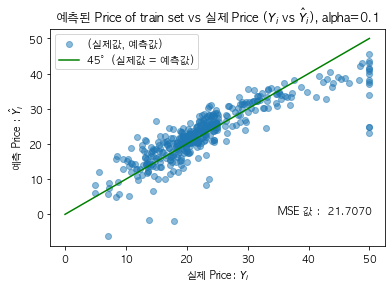

In [37]:
import matplotlib.pyplot as plt
import numpy as np              
from sklearn.metrics import mean_squared_error

plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
plt.xlabel("실제 Price: $Y_i$")
plt.ylabel("예측 Price : $\hat{Y}_i$")
plt.legend()
plt.title("예측된 Price of train set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$), " + f"alpha={alpha_value}")
plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
plt.show()

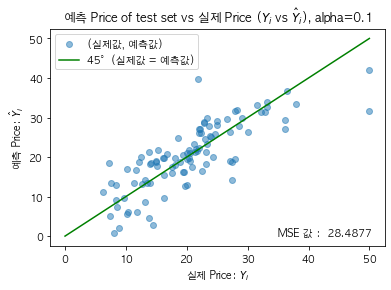

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

plt.scatter(Y_test,Y_pred, label = '(실제값, 예측값)', alpha=.5)
plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
plt.xlabel("실제 Price: $Y_i$")
plt.ylabel("예측 Price: $\hat{Y}_i$")
plt.legend()
plt.title("예측 Price of test set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$), " + f"alpha={alpha_value}")
plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error(Y_test,Y_pred) : .4f}')
plt.show()

### C. 모형 적합성 검정 (잔차분석)

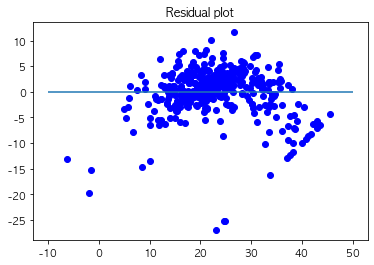

In [39]:
# 잔차 분석
resid = Y_pred_train - Y_train

plt.scatter(Y_pred_train, resid, c='b')
plt.hlines(y=0, xmin= -10, xmax=50)
plt.title('Residual plot')
plt.show()

In [40]:
# 정규성 검정 (귀무가설 : 정규성를 따른다)
from scipy.stats import jarque_bera

statistic, pvalue = jarque_bera(resid)
print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')

검정통계치 :  1217.74078
p값 :  0.00000


In [41]:
# 등분산 검정 (귀무가설 : 오차항이 등분산성을 따른다)
from statsmodels.stats.api import het_breuschpagan

# Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = het_breuschpagan(resid, X_train)

# 독립변수, featue의 values (endog는 y값)

for i in zip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')

Lag_range multiplier statistic :  75.176
p-value :  0.000
f-value :  6.369
f p-value :  0.000


In [42]:
# 더빈왓슨 통계 (DW-test)
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=resid)

1.871644904702377

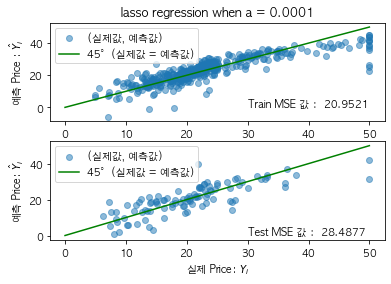

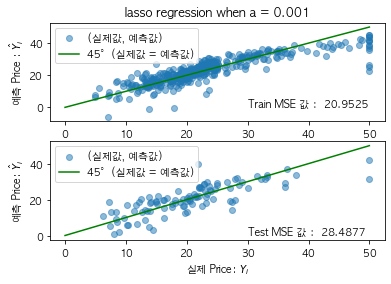

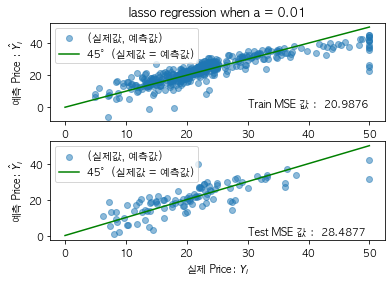

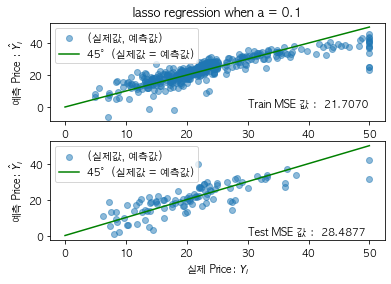

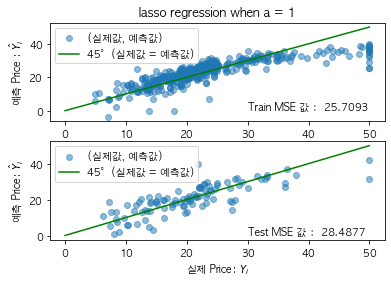

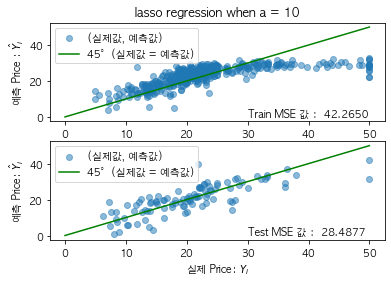

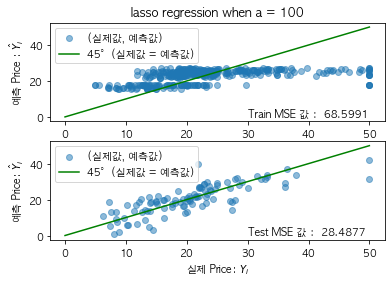

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# feature, target 분리
feature = data.drop(columns='MEDV')
target = data['MEDV']

# 훈련, 검정셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

# 빈 리스트 셍성
train_score = []
test_score = []
r_squared = []
intercept = []
mse_train = []
mse_test = []
n_iter = []
# 하이퍼파라미터 적용
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# 라소 회귀 요약 데이터 형성
lasso_data = pd.DataFrame()

for alpha in alpha_list:
    # 라소 회귀 시행
    lasso = Lasso(alpha= alpha, max_iter = 10000).fit(X_train, Y_train)
    # 결정계수 및 절편 리스트
    train_score.append(np.round(lasso.score(X_train, Y_train), 4))
    test_score.append(np.round(lasso.score(X_test, Y_test), 4))
    intercept.append(np.round(lasso.intercept_, 4))
    # 라소 회귀에서 도출된 각 feature의 계수
    lasso_data = pd.concat([lasso_data, pd.DataFrame(np.round(lasso.coef_, 4), lasso.feature_names_in_)], axis=1)
    # 훈련, 검정셋에서 y 값 예측 (기댓값 도출)
    Y_pred_train = lasso.predict(X_train)
    y_pred = lasso.predict(X_test)
    # 훈련, 검정셋에서 MSE 도출 
    mse_train.append(np.round(mean_squared_error(Y_train,Y_pred_train),4))
    mse_test.append(np.round(mean_squared_error(Y_test,Y_pred),4))
    n_iter.append(lasso.n_iter_)

    plt.subplot(2,1,1)
    plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
    plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
    plt.xlabel("실제 Price: $Y_i$")
    plt.ylabel("예측 Price : $\hat{Y}_i$")
    plt.title(f'lasso regression when a = {alpha}')
    plt.legend()
    plt.text(y=0,x=30, s=f'Train MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
    plt.subplot(2,1,2)
    plt.scatter(Y_test,Y_pred, label = '(실제값, 예측값)', alpha=.5)
    plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
    plt.xlabel("실제 Price: $Y_i$")
    plt.ylabel("예측 Price: $\hat{Y}_i$")
    plt.legend(loc='upper left')
    plt.text(y=0,x=30, s=f'Test MSE 값 : {mean_squared_error(Y_test,Y_pred) : .4f}')
    plt.show()


In [44]:
lasso_data.columns = [f'alpha = {i}' for i in alpha_list]

In [45]:
score = pd.DataFrame({'R^2 of Train' : train_score,
                      'R^2 of Test' : test_score,
                      'intercept' : intercept,
                      'mse_train' : mse_train,
                      'mse_test' : mse_test,
                      'n_iter' : n_iter}).transpose()
score.columns= [f'alpha = {i}' for i in alpha_list]
score

,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
R^2 of Train,0.7573,0.7573,0.7569,0.7486,0.7022,0.5104,0.2054
R^2 of Test,0.6203,0.6199,0.6155,0.6015,0.6474,0.5959,0.2546
intercept,27.4290,27.2467,25.4238,20.6635,39.1548,30.5096,28.9067
mse_train,20.9521,20.9525,20.9876,21.7070,25.7093,42.2650,68.5991
mse_test,28.4877,28.4877,28.4877,28.4877,28.4877,28.4877,28.4877
n_iter,98.0000,71.0000,68.0000,32.0000,43.0000,14.0000,7.0000


In [46]:
lasso_summary = pd.concat([lasso_data, score], axis=0)
lasso_summary

,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
Unnamed: 0,-0.0032,-0.0032,-0.0033,-0.0032,-0.0005,0.0024,0.0000
CRIM,-0.1105,-0.1104,-0.1091,-0.1037,-0.0688,-0.0000,-0.0000
ZN,0.0433,0.0434,0.0440,0.0461,0.0447,0.0249,0.0000
INDUS,0.0478,0.0466,0.0350,0.0000,-0.0000,-0.0000,-0.0000
CHAS,2.7833,2.7665,2.5977,1.0799,0.0000,0.0000,0.0000
NOX,-13.3563,-13.0623,-10.1208,-0.0000,-0.0000,0.0000,-0.0000
RM,4.7660,4.7656,4.7613,4.5452,1.4742,0.0000,0.0000
AGE,-0.0159,-0.0161,-0.0181,-0.0214,0.0158,0.0029,-0.0000
DIS,-1.4559,-1.4513,-1.4058,-1.2234,-0.7733,-0.0000,0.0000
RAD,0.3226,0.3221,0.3171,0.3056,0.2838,0.0000,-0.0000


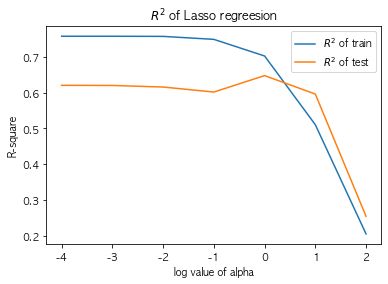

In [47]:
plt.plot(np.log10(alpha_list), train_score, label ='$R^2$ of train')
plt.plot(np.log10(alpha_list), test_score, label ='$R^2$ of test')
plt.xlabel('log value of alpha')
plt.ylabel('R-square')
plt.title('$R^2$ of Lasso regreesion')
plt.legend()
plt.show()

In [48]:
# 함수화 작업
def lasso_regression(data, target_col, plot=True):
    # 라이브러리 호출 
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import train_test_split

    # feature, target 분리
    feature = data.drop(columns=target_col)
    target = data[target_col]

    # 훈련, 검정셋 분리
    X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

    # 빈 리스트 셍성
    train_score = []
    test_score = []
    r_squared = []
    intercept = []
    mse_train = []
    mse_test = []
    n_iter = []
    # 하이퍼파라미터 적용
    alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    # 라소 회귀 요약 데이터 형성
    lasso_data = pd.DataFrame()

    for alpha in alpha_list:
        # 라소 회귀 시행
        lasso = Lasso(alpha= alpha, max_iter = 10000).fit(X_train, Y_train)
        # 결정계수 및 절편 리스트
        train_score.append(np.round(lasso.score(X_train, Y_train), 4))
        test_score.append(np.round(lasso.score(X_test, Y_test), 4))
        intercept.append(np.round(lasso.intercept_, 4))
        # 라소 회귀에서 도출된 각 feature의 계수
        lasso_data = pd.concat([lasso_data, pd.DataFrame(np.round(lasso.coef_, 4), lasso.feature_names_in_)], axis=1)
        # 훈련, 검정셋에서 y 값 예측 (기댓값 도출)
        Y_pred_train = lasso.predict(X_train)
        y_pred = lasso.predict(X_test)
        # 훈련, 검정셋에서 MSE 도출 
        mse_train.append(np.round(mean_squared_error(Y_train,Y_pred_train),4))
        mse_test.append(np.round(mean_squared_error(Y_test,Y_pred),4))
        n_iter.append(lasso.n_iter_)
        
        # 도식화 여부
        if plot == True:
            plt.subplot(2,1,1)
            plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price : $\hat{Y}_i$")
            plt.title(f'lasso regression when a = {alpha}')
            plt.legend()
            plt.text(y=0,x=30, s=f'Train MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
            plt.subplot(2,1,2)
            plt.scatter(Y_test,Y_pred, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price: $\hat{Y}_i$")
            plt.legend(loc='upper left')
            plt.text(y=0,x=30, s=f'Test MSE 값 : {mean_squared_error(Y_test,Y_pred) : .4f}')
            plt.show()
        else:
            pass
    
    # 결정계수 출력
    plt.plot(np.log10(alpha_list), train_score, label ='$R^2$ of train')
    plt.plot(np.log10(alpha_list), test_score, label ='$R^2$ of test')
    plt.title('$R^2$ of Lasso regreesion')
    plt.xlabel('log value of alpha')
    plt.ylabel('R-square')
    plt.legend()
    plt.show()
    
    # 라소 회귀 요약 데이터 형성
    lasso_data.columns = [f'alpha = {i}' for i in alpha_list]
    score = pd.DataFrame({'R^2 of Train' : train_score,
                        'R^2 of Test' : test_score,
                        'intercept' : intercept,
                        'mse_train' : mse_train,
                        'mse_test' : mse_test,
                        'n_iter' : n_iter}).transpose()
    score.columns= [f'alpha = {i}' for i in alpha_list]
    lasso_summary = pd.concat([lasso_data, score], axis=0)

    return lasso_summary

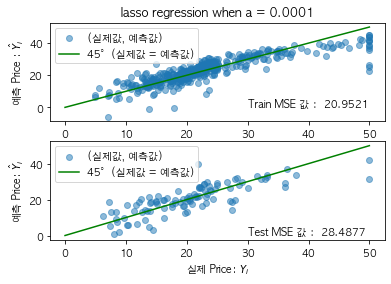

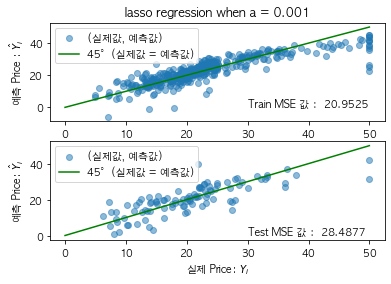

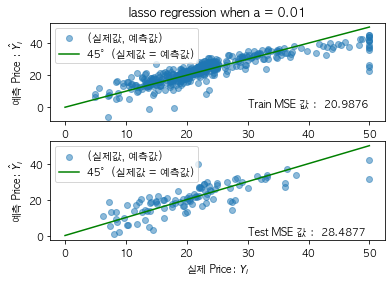

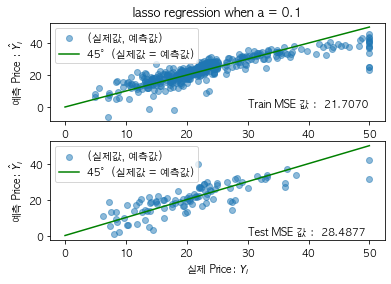

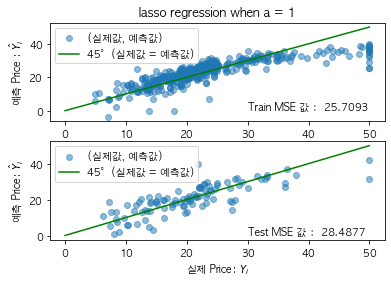

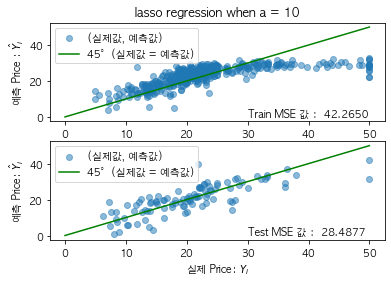

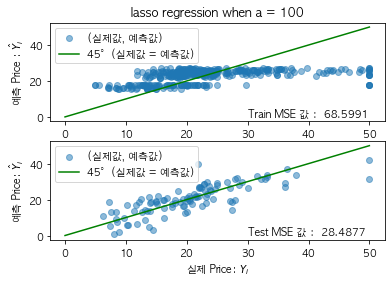

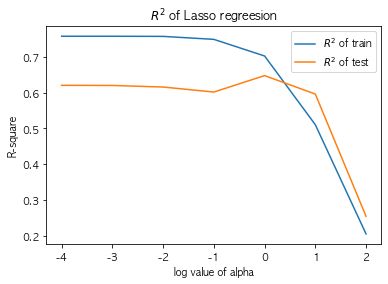

,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
Unnamed: 0,-0.0032,-0.0032,-0.0033,-0.0032,-0.0005,0.0024,0.0000
CRIM,-0.1105,-0.1104,-0.1091,-0.1037,-0.0688,-0.0000,-0.0000
ZN,0.0433,0.0434,0.0440,0.0461,0.0447,0.0249,0.0000
INDUS,0.0478,0.0466,0.0350,0.0000,-0.0000,-0.0000,-0.0000
CHAS,2.7833,2.7665,2.5977,1.0799,0.0000,0.0000,0.0000
NOX,-13.3563,-13.0623,-10.1208,-0.0000,-0.0000,0.0000,-0.0000
RM,4.7660,4.7656,4.7613,4.5452,1.4742,0.0000,0.0000
AGE,-0.0159,-0.0161,-0.0181,-0.0214,0.0158,0.0029,-0.0000
DIS,-1.4559,-1.4513,-1.4058,-1.2234,-0.7733,-0.0000,0.0000
RAD,0.3226,0.3221,0.3171,0.3056,0.2838,0.0000,-0.0000


In [49]:
lasso_regression(data,'MEDV')

## Ridge 회귀 분석

### A. Ridge 시행

In [50]:
from sklearn.linear_model import Ridge

# 릿지 회귀
ridge = Ridge().fit(X_train, Y_train)


In [51]:
# 함수화 작업
def ridge_regression(data, target_col, plot=True):
    # 라이브러리 호출 
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split

    # feature, target 분리
    feature = data.drop(columns=target_col)
    target = data[target_col]

    # 훈련, 검정셋 분리
    X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

    # 빈 리스트 셍성
    train_score = []
    test_score = []
    r_squared = []
    intercept = []
    mse_train = []
    mse_test = []
    # 하이퍼파라미터 적용
    alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    # 라소 회귀 요약 데이터 형성
    ridge_data = pd.DataFrame()

    for alpha in alpha_list:
        # 라소 회귀 시행
        ridge = Ridge(alpha= alpha, max_iter = 10000).fit(X_train, Y_train)
        # 결정계수 및 절편 리스트
        train_score.append(np.round(ridge.score(X_train, Y_train), 4))
        test_score.append(np.round(ridge.score(X_test, Y_test), 4))
        intercept.append(np.round(ridge.intercept_, 4))
        # 라소 회귀에서 도출된 각 feature의 계수
        ridge_data = pd.concat([ridge_data, pd.DataFrame(np.round(ridge.coef_, 4), ridge.feature_names_in_)], axis=1)
        # 훈련, 검정셋에서 y 값 예측 (기댓값 도출)
        Y_pred_train = ridge.predict(X_train)
        y_pred = ridge.predict(X_test)
        # 훈련, 검정셋에서 MSE 도출 
        mse_train.append(np.round(mean_squared_error(Y_train,Y_pred_train),4))
        mse_test.append(np.round(mean_squared_error(Y_test,Y_pred),4))
        
        # 도식화 여부
        if plot == True:
            plt.subplot(2,1,1)
            plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price : $\hat{Y}_i$")
            plt.title(f'ridge regression when a = {alpha}')
            plt.legend()
            plt.text(y=0,x=30, s=f'Train MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
            plt.subplot(2,1,2)
            plt.scatter(Y_test,Y_pred, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price: $\hat{Y}_i$")
            plt.legend(loc='upper left')
            plt.text(y=0,x=30, s=f'Test MSE 값 : {mean_squared_error(Y_test,Y_pred) : .4f}')
            plt.show()
        else:
            pass
    
    # 결정계수 출력
    plt.plot(np.log10(alpha_list), train_score, label ='$R^2$ of train')
    plt.plot(np.log10(alpha_list), test_score, label ='$R^2$ of test')
    plt.title('$R^2$ of ridge regreesion')
    plt.xlabel('log value of alpha')
    plt.ylabel('R-square')
    plt.legend()
    plt.show()
    
    # 라소 회귀 요약 데이터 형성
    ridge_data.columns = [f'alpha = {i}' for i in alpha_list]
    score = pd.DataFrame({'R^2 of Train' : train_score,
                        'R^2 of Test' : test_score,
                        'intercept' : intercept,
                        'mse_train' : mse_train,
                        'mse_test' : mse_test}).transpose()
    score.columns= [f'alpha = {i}' for i in alpha_list]
    ridge_summary = pd.concat([ridge_data, score], axis=0)

    return ridge_summary

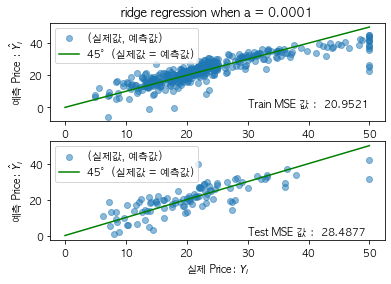

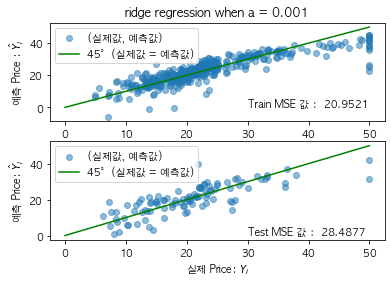

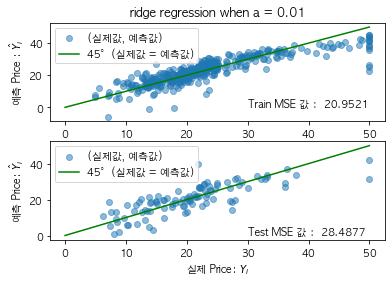

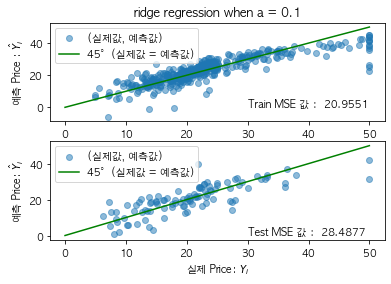

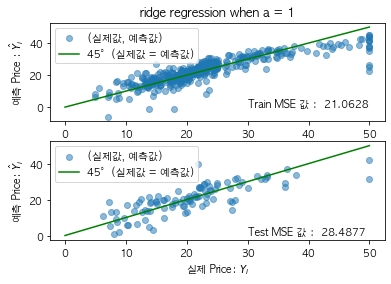

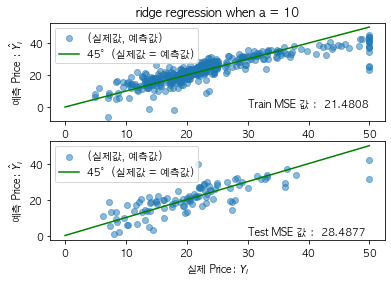

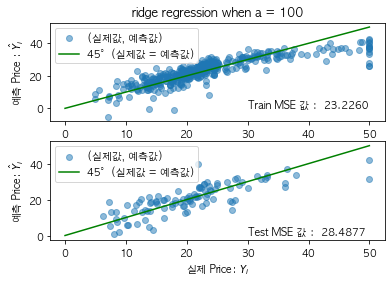

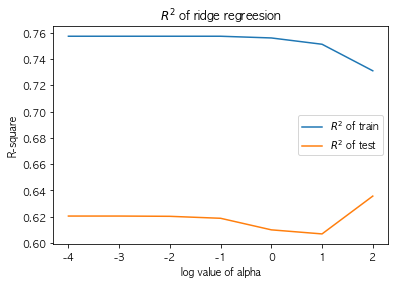

,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
Unnamed: 0,-0.0032,-0.0032,-0.0032,-0.0032,-0.0034,-0.0034,-0.0023
CRIM,-0.1106,-0.1106,-0.1105,-0.1102,-0.1082,-0.1063,-0.1035
ZN,0.0433,0.0433,0.0433,0.0436,0.0448,0.0476,0.0537
INDUS,0.0479,0.0478,0.0475,0.0440,0.0244,0.0001,-0.0146
CHAS,2.7852,2.7850,2.7831,2.7652,2.6259,1.9128,0.5552
NOX,-13.3880,-13.3785,-13.2844,-12.4117,-7.4900,-1.5069,-0.1595
RM,4.7661,4.7661,4.7665,4.7701,4.7712,4.4203,2.4461
AGE,-0.0159,-0.0159,-0.0160,-0.0167,-0.0205,-0.0219,-0.0027
DIS,-1.4564,-1.4562,-1.4549,-1.4424,-1.3727,-1.2931,-1.2028
RAD,0.3226,0.3226,0.3224,0.3210,0.3134,0.3164,0.3642


In [52]:
ridge_regression(data,'MEDV')

### B. 모형 적합성 검정

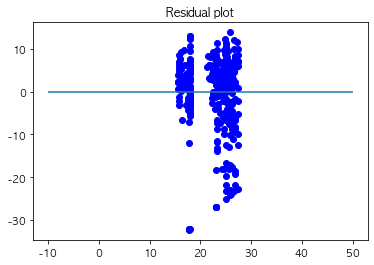

In [53]:
# 잔차 분석
resid = Y_pred_train - Y_train

plt.scatter(Y_pred_train, resid, c='b')
plt.hlines(y=0, xmin= -10, xmax=50)
plt.title('Residual plot')
plt.show()

In [54]:
# 정규성 검정 (귀무가설 : 정규성를 따른다)
from scipy.stats import jarque_bera

statistic, pvalue = jarque_bera(resid)
print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')

검정통계치 :  327.21723
p값 :  0.00000


In [55]:
# 등분산 검정 (귀무가설 : 오차항이 등분산성을 따른다)
from statsmodels.stats.api import het_breuschpagan

# Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = het_breuschpagan(resid, X_train)

# 독립변수, featue의 values (endog는 y값)

for i in zip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')

Lag_range multiplier statistic :  157.564
p-value :  0.000
f-value :  17.811
f p-value :  0.000


In [56]:
# 더빈왓슨 통계 (DW-test)
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=resid)

1.8789733540658722